In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score
from matplotlib_venn import venn2

In [2]:
training_results = pd.read_csv("../data/IDX/target_transitions_to_learn_conv_optimizedValues.csv")
training_results

,Unnamed: 0,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training,HRMS_CE,Converted_CE
0,5,Adenine,134.047,0.3,1.0,-1,107.054,17.17,63,1,40.0,14.452468
1,6,Adenine,134.047,0.3,1.0,-1,92.042,19.20,63,1,40.0,14.452468
2,7,Adenine,134.047,0.3,1.0,-1,65.196,28.08,63,1,70.0,24.414355
3,18,Citrate,191.020,0.3,1.0,-1,87.042,16.79,43,1,30.0,16.895822
4,19,Citrate,191.020,0.3,1.0,-1,85.196,15.61,43,1,30.0,16.895822
5,20,Citrate,191.020,0.3,1.0,-1,111.054,12.08,43,1,20.0,13.575193
6,28,Lactate,89.024,0.3,1.0,-1,71.083,9.30,33,1,40.0,9.897471
7,30,Lactate,89.024,0.3,1.0,-1,87.054,8.29,33,1,90.0,26.500617
8,36,Adenosine,268.104,0.3,1.0,1,136.125,19.57,62,1,30.0,24.694444
9,37,Adenosine,268.104,0.3,1.0,1,119.054,47.38,62,1,90.0,44.618220


Text(0.5, 1.0, 'Conversion Cpds: R2 = 0.83')

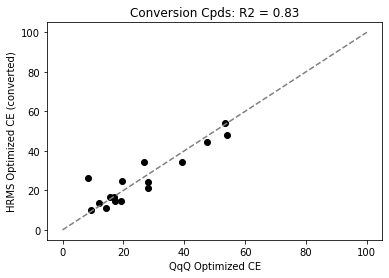

In [3]:
plt.scatter(training_results["CE"],training_results["Converted_CE"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(training_results["CE"],training_results["Converted_CE"])
plt.title("Conversion Cpds: R2 = "+str(np.round(r2,2)))

In [4]:
totalTransitionInfoFn = "../data/IDX/M3T_transitions_ALTIS_optimized_allCpds.csv"
totalTransitions = pd.read_csv(totalTransitionInfoFn)
totalTransitions

,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training
0,6-PGA,275.104,8.3,9.3,-1,96.970,15.74,64,0
1,6-PGA,275.104,7.8,9.8,-1,257.196,11.70,64,0
2,6-PGA,275.104,7.8,9.8,-1,79.042,35.12,64,0
3,6-PGA,275.104,7.8,9.8,-1,177.071,14.86,64,0
4,Acetoacetyl-CoA,850.129,5.3,7.3,-1,766.167,28.55,149,0
...,...,...,...,...,...,...,...,...,...
286,UDP-N-acetyl-GN,608.002,6.2,8.2,1,186.196,23.96,63,0
287,UDP-N-acetyl-GN,608.002,6.2,8.2,1,168.125,29.01,63,0
288,Valine,118.086,3.5,6.5,1,57.196,29.47,30,0
289,Valine,118.086,3.5,6.5,1,55.071,20.88,30,0


In [5]:
resultData = pd.read_csv("../data/IDX/IDX_MS2_data/generated_SRM_table.csv")
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity
0,0,Acetoacetyl-CoA,0.3,1.0,850.129,-1,766.11,80.257542,3.872323
1,1,Acetoacetyl-CoA,0.3,1.0,850.129,-1,408.01,83.578171,1.976209
2,2,Acetoacetyl-CoA,0.3,1.0,850.129,-1,158.93,90.219429,1.419119
3,3,Acetoacetyl-CoA,0.3,1.0,850.129,-1,426.02,83.578171,1.380550
4,4,Acetoacetyl-CoA,0.3,1.0,850.129,-1,419.04,83.578171,1.347797
...,...,...,...,...,...,...,...,...,...
170,170,Valine,0.3,1.0,118.086,1,72.08,6.196428,0.932067
171,171,Valine,0.3,1.0,118.086,1,55.05,12.837686,0.316696
172,172,Valine,0.3,1.0,118.086,1,57.06,19.478945,0.101919
173,173,Valine,0.3,1.0,118.086,1,56.05,26.120203,0.058657


In [6]:
evalData = totalTransitions[totalTransitions["Training"] < .5]
fragTol = .5

transition_indices = {}
for index,row in totalTransitions.iterrows():
    new = True
    for x in transition_indices:
        if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
            new = False
            transition_indices[x]["QqQ Optimized CE"] = row["CE"]
            break
    if new:
        transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"QqQ Optimized CE":row["CE"]}
        
for index,row in resultData.iterrows():
    new = True
    for x in transition_indices:
        if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
            new = False
            transition_indices[x]["HRMS Optimized CE (converted)"] = row["CE"]
            break
    if new:
        transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"HRMS Optimized CE (converted)":row["CE"]}
evaluation_results = pd.DataFrame.from_dict(transition_indices,orient="index")
evaluation_results

QqQ Optimized CE  HRMS Optimized CE (converted)
6-PGA           96.970  -1             15.74                            NaN
                257.196 -1             11.70                            NaN
                79.042  -1             35.12                            NaN
                177.071 -1             14.86                            NaN
Acetoacetyl-CoA 766.167 -1             28.55                      80.257542
...                                      ...                            ...
Threonine       84.040   1               NaN                       6.396745
Tryptophan      91.050   1               NaN                      34.923144
                115.050  1               NaN                      38.243774
Valine          72.080   1               NaN                       6.196428
                56.050   1               NaN                      26.120203

[364 rows x 2 columns]

90


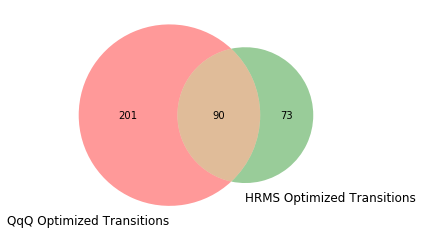

In [7]:
sharedInds = []
QqQ_trans = []
HRMS_trans = []

for index,row in evaluation_results.iterrows():
    if not (pd.isna(row["QqQ Optimized CE"]) or pd.isna(row["HRMS Optimized CE (converted)"])):
        sharedInds.append(index)
    if not pd.isna(row["QqQ Optimized CE"]):
        QqQ_trans.append(index)
    if not pd.isna(row["HRMS Optimized CE (converted)"]):
        HRMS_trans.append(index)
print(len(sharedInds))
filt = evaluation_results.loc[sharedInds,:]

venn2([set(QqQ_trans),set(HRMS_trans)],set_labels=["QqQ Optimized Transitions","HRMS Optimized Transitions"])


Text(0.5, 1.0, 'Evaluation Cpds: R2 = -0.92')

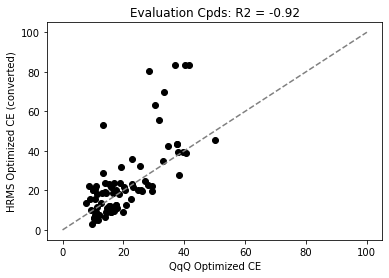

In [8]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))